In [1]:
import numpy as np
import seaborn as sns
import hickle as hkl
import rasterio as rs


KeyboardInterrupt



In [ ]:
import os
from scipy.ndimage import median_filter, maximum_filter, percentile_filter

x = rs.open('abirem-ttc.tif').read(1)
src = rs.open('abirem-new.tif')

def cleanup_noisy_zeros(preds, ttc):
    is_fp_zero = np.logical_and(preds == 0, ttc > 20)
    preds_flt = median_filter(np.copy(preds), 5)
    preds[is_fp_zero] = preds_flt[is_fp_zero]
    preds = preds * (ttc > 10)
    return preds

y = cleanup_noisy_zeros(src.read(1), x)

with rs.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    profile = src.profile

    # And then change the band count to 1, set the
    # dtype to uint8, and specify LZW compression.
    profile.update(
        dtype=rs.uint8,
        count=1,
        compress='lzw')

    with rs.open('example.tif', 'w', **profile) as dst:
        dst.write(y.astype(rs.uint8), 1)

In [ ]:
brightnesses = []
for i in l:
    x = rs.open(path + i).read()
    brightness = np.mean(x, axis = 0)
    brightnesses.append(np.std(brightness))
    #sns.heatmap(x[0])

In [44]:
np.mean(brightnesses)

22.12841548332253

In [42]:
np.diff(brightnesses)

array([ 1.82250331, -6.28188036,  2.4043796 ,  5.32185698,  2.59248109,
       -9.09846431, -6.82017035])

In [16]:
import os
from scipy.ndimage.morphology import binary_dilation, generate_binary_structure

x = load_mosaic_predictions("../project-monitoring/tiles/2022//341/1272/processed/", depth = 1)

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import hickle as hkl
import rasterio as rs
plt.figure(figsize=(11,8))
#sns.heatmap(x[-4])

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

In [21]:
#y = rs.open('../src/gain.tif').read(1)
y = np.load('../src/zlabeled.npy')
g = np.load('../src/gain2.npy')
x = np.load('../src/movingavg.npy')
s = np.load("../src/notree.npy")
plt.figure(figsize=(8,6))
#y = np.logical_and(y <= 25, y > 21)
y = y == 89

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

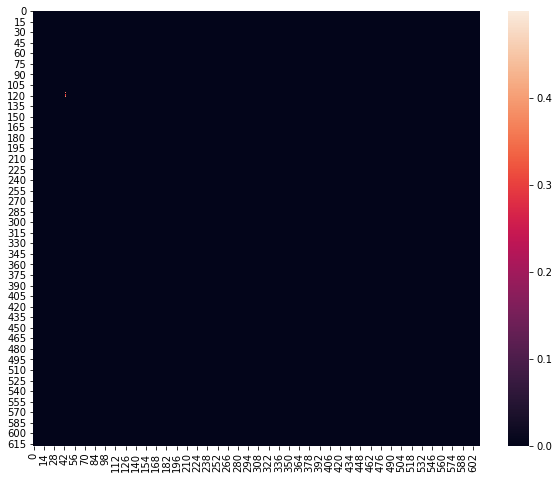

In [22]:
maxdiff = np.max(x[-10:], axis = 0) - np.min(x[:10], axis = 0)
plt.figure(figsize=(10,8))
sns.heatmap((maxdiff * y))

<AxesSubplot:>

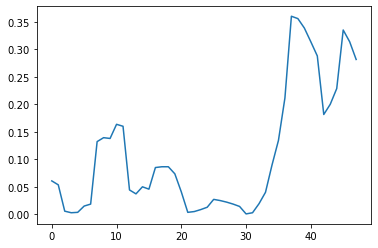

In [23]:
gain = x[:, y > 0]
#stable = x[:, s == 0]
#sns.lineplot(y = np.mean(stable, axis = 1), x = np.arange(x.shape[0]))
sns.lineplot(y = np.mean(gain, axis = 1), x = np.arange(x.shape[0]))
#sns.lineplot(y = np.ones((0.24)))

In [17]:
 np.mean(gain, axis = 1)

array([0.08565423, 0.05213642, 0.02352638, 0.01726298, 0.02166452,
       0.0633462 , 0.08217503, 0.19856714, 0.21239382, 0.21167739,
       0.2105577 , 0.22283569, 0.10271986, 0.103861  , 0.15079794,
       0.14365937, 0.14432862, 0.16800515, 0.15557701, 0.12402403,
       0.09942085, 0.08788932, 0.09181467, 0.12033033, 0.13057915,
       0.1448949 , 0.12821965, 0.11189189, 0.08590734, 0.0579408 ,
       0.04090948, 0.05256542, 0.06853282, 0.09972544, 0.1446804 ,
       0.18265552, 0.22432433, 0.30538825, 0.32949378, 0.31929644,
       0.31352639, 0.32825397, 0.29294294, 0.30611755, 0.31117117,
       0.37172887, 0.35209352, 0.30860146])